In [61]:
import pandas as pd
import numpy as np
import datetime as dt
import statistics as st
import matplotlib.pyplot as plt
import warnings


### Settings

In [62]:
#Remove os warnings do notebook
warnings.filterwarnings('ignore')

In [63]:
COLUMNS = ['Unnamed: 0', 'revenue','cost-goods-sold','gross-profit','research-development-expenses','selling-general-administrative-expenses','operating-expenses','operating-income','total-non-operating-income-expense','pre-tax-income','total-provision-income-taxes','income-after-taxes','income-from-continuous-operations','income-from-discontinued-operations','net-income','ebitda','ebit','basic-shares-outstanding','shares-outstanding','eps-basic-net-earnings-per-share','eps-earnings-per-share-diluted','cash-on-hand','receivables-total','inventory','other-current-assets','total-current-assets','net-property-plant-equipment','long-term-investments','goodwill-intangible-assets-total','other-long-term-assets','total-long-term-assets','total-assets','total-current-liabilities','long-term-debt','other-non-current-liabilities','total-long-term-liabilities','total-liabilities','common-stock-net','retained-earnings-accumulated-deficit','comprehensive-income','total-share-holder-equity','total-liabilities-share-holders-equity','net-income-loss','total-depreciation-amortization-cash-flow','other-non-cash-items','total-non-cash-items','change-in-accounts-receivable','change-in-inventories','change-in-accounts-payable','change-in-assets-liabilities','total-change-in-assets-liabilities','cash-flow-from-operating-activities','net-change-in-property-plant-equipment','net-change-in-intangible-assets','net-acquisitions-divestitures','investing-activities-other','cash-flow-from-investing-activities','net-long-term-debt','net-current-debt','debt-issuance-retirement-net-total','net-common-equity-issued-repurchased','net-total-equity-issued-repurchased','total-common-preferred-stock-dividends-paid','financial-activities-other','cash-flow-from-financial-activities','net-cash-flow','stock-based-compensation','common-stock-dividends-paid','current-ratio','long-term-debt-capital','debt-equity-ratio','gross-margin','operating-margin','ebit-margin','pre-tax-profit-margin','net-profit-margin','asset-turnover','inventory-turnover','receiveable-turnover','days-sales-in-receivables','roe','return-on-tangible-equity','roa','roi','book-value-per-share','operating-cash-flow-per-share','free-cash-flow-per-share']

TICKERS = ['AAPL','MSFT','AMZN','GOOGL','GOOG','TSLA','BRK.B','UNH','JNJ','NVDA','META','XOM','PG','V','JPM','HD','PFE','MA','CVX','ABBV','LLY','KO','MRK','PEP','COST','BAC','VZ',
'TMO','AVGO','MCD','ABT','WMT','CMCSA','ADBE','CSCO','ACN','DIS','DHR','CRM','QCOM','BMY','INTC','WFC','T','TXN','PM','LIN','RTX','NKE','AMGN','UPS','UNP','AMD','IBM','CVS',
'LOW','SPGI','AMT','MDT','HON','ELV','ORCL','INTU','COP','MS','GS','LMT','SCHW','CAT','SBUX','ADP','PLD','C','NOW','MDLZ','CI','BLK','AXP','DUK','DE','BA','AMAT','PYPL','ZTS','ADI',
'TMUS','CB','NFLX','GILD','SO','MO','MMC','CCI','ISRG','VRTX','MMM','CME','TJX','BKNG','TGT','NOC','GE','BDX','MU','PGR','CL','REGN','SYK','D','PNC','CSX','EW','TFC','HUM','USB',
'ATVI','SHW','LRCX','WM','AON','DG','EL','FIS','EQIX','EOG','MRNA','CHTR','FISV','NSC','BSX','ICE','FDX','OXY','CNC','ITW','ETN','APD','AEP','GD','KLAC','MCK','PSA','SNPS','SRE',
'PXD','EMR','GM','KMB','GIS','F','MCO','SLB','ORLY','SYY','NEM','MPC','AZO','EXC','LHX','NXPI','CDNS','O','ROP','STZ','VLO','COF','IQV','ADM','MET','FTNT','MAR','APH','AIG','HCA',
'ECL','PSX','DLTR','XEL','WMB','TRV','ADSK','CTVA','TEL','MNST','FCX','WELL','DOW','PAYX','MSI','CMG','A','SBAC','EA','DLR','CTAS','PRU','AJG','YUM','CTSH','MCHP','ALL','MSCI','HPQ',
'ED','JCI','RMD','KMI','AFL','BAX','GPN','DVN','HSY','HLT','PH','WEC','BIIB','KR','IDXX','SPG','CARR','PEG','VICI','DXCM','WBD','BK','TT','OTIS','NUE','IFF','ES','VRSK','TDG','DFS',
'CMI','DD','KHC','PCAR','ROST','PPG','FAST','FRC','KDP','MTB','RSG','AWK','ENPH','WBA','AVB','MTD','HES','WY','TROW','KEYS','AME','AMP','BKR','HAL','CBRE','GLW','OKE',
'CPRT','DTE','TSN','EQR','APTV','EBAY','DHI','ON','ODFL','CHD','EIX','ROK','TSCO','EFX','SIVB','ALB','LUV','LH','ETR','AEE','EXR','ANET','LYB','FITB','STT','BALL','WST','WTW','CDW',
'FE','CTRA','DRE','ZBH','ABC','STE','HIG','ARE','MKC','PPL','ANSS','LEN','ULTA','WAT','GWW','VTR','NTRS','GPC','VMC','MLM','TTWO','IT','FTV','CMS','DAL','MAA','CEG','AMCR','K','CNP',
'PWR','FANG','ALGN','MTCH','CLX','CTLT','URI','NDAQ','HOLX','TDY','CFG','RF','HBAN','MPWR','RJF','BR','HPE','ESS','DOV','EPAM','VRSN','CF','PKI','MOH','CINF','SWKS','MOS','J','IR',
'EXPD','SWK','FLT','CAG','DGX','IP','ZBRA','ATO','KEY','WAB','STX','CAH','SYF','DRI','FDS','TER','SEDG','INCY','EVRG','POOL','GRMN','DPZ','PARA','NTAP','MRO','VFC','KMX','BBY',
'LNT','PFG','WDC','SJM','TRMB','COO','AKAM','CPT','PAYC','JBHT','PEAK','LDOS','IEX','JKHY','AES','BRO','HRL','AVY','XYL','NLOK','NVR','LKQ','EXPE','TYL','TECH','OMC','UDR','GNRC',
'WRB','BF.B','TXT','IRM','PKG','MAS','FMC','CTXS','CHRW','HWM','CBOE','UAL','BXP','KIM','VTRS','LVS','ABMD','NI','AAP','CE','SBNY','EMN','TFX','HST','LYV','NDSN','TAP','L','IPG',
'APA','LW','QRVO','PTC','SNA','CRL','HSIC','RE','BIO','PHM','FOXA','WRK','HAS','ETSY','MGM','CPB','MKTX','LUMN','AIZ','CMA','AAL','JNPR','GL','WHR','REG','NRG','FFIV','ALLE','FBHS',
'RHI','SEE','NLSN','TPR','HII','OGN','PNW','BWA','ROL','LNC','CZR','PNR','XRAY','ZION','AOS','NWL','RCL','DXC','CCL','UHS','BEN','FRT','CDAY','MHK','BBWI','NWSA','WYNN','IVZ','DVA',
'ALK','PENN','NCLH','VNO','FOX','RL','DISH','PVH','NWS','EMBC']

#TICKERS = ['AAPL']

fails = []


In [64]:
FORMAT_PATH = 'new_data/result_{}.csv'

FINAL_PATH = 'new_dataset_2/final_{}.csv'

FINAL_PROCESS_PATH = 'new_dataset_2/process_final_{}.csv'

REAL_RETURN = "RealReturn"

REAL_RETURN_CLASS = "RealReturnClass"

RISK = 'Risk'

RISK_CLASS = 'RiskClass'

N_PERIODS = 2

ROI = "roi"

DATE = 'Unnamed: 0'

### Creating Final Dataset

In [65]:
columns_dataset = COLUMNS
columns_dataset.append(REAL_RETURN)
columns_dataset.append(RISK)
columns_dataset.append(REAL_RETURN_CLASS)
columns_dataset.append(RISK_CLASS)

df_final = pd.DataFrame(columns=columns_dataset)
df_final

,Unnamed: 0,revenue,cost-goods-sold,gross-profit,research-development-expenses,selling-general-administrative-expenses,operating-expenses,operating-income,total-non-operating-income-expense,pre-tax-income,...,return-on-tangible-equity,roa,roi,book-value-per-share,operating-cash-flow-per-share,free-cash-flow-per-share,RealReturn,Risk,RealReturnClass,RiskClass


### Process Data

#### Calculate period

In [66]:
def calculatePeriod(dt_start:str, dt_end:str):
  dt_start = dt.datetime.strptime(dt_start, "%Y-%m-%d")
  dt_end = dt.datetime.strptime(dt_end, "%Y-%m-%d")

  return dt_start - dt_end

#### Calculate Real Return

In [67]:
def calcRealReturn(start:int, data:pd.DataFrame):
  real_return = 1
  list_roi = []
  for i in range(start, start - (N_PERIODS), -1):
    real_return *= (1 + data.iloc[i][ROI]/100)
    list_roi.append(data.iloc[i][ROI]/100)
  
  return real_return - 1, list_roi

#### Process

In [68]:
def processDataset(data:pd.DataFrame):
  data = data.dropna(axis=1, how='all')
  data[REAL_RETURN] = ""
  data[RISK] = ""
  
  for i in range(N_PERIODS - 1, len(data)):
    period = calculatePeriod(data.iloc[i][DATE], data.iloc[i - (N_PERIODS - 1)][DATE])  
    
    calc = calcRealReturn(i, data)
    realReturn = calc[0]
    list_roi = calc[1]

    if period.days < (90 * (N_PERIODS-1)) + 10:
      data[REAL_RETURN][i] = round(realReturn, 4)
      try:
        data[RISK][i] = round(st.stdev(list_roi), 4)
      except:
        data[RISK][i] = np.NaN
      
  data[REAL_RETURN].replace('', np.NaN, inplace=True)
  return data.dropna(subset=[REAL_RETURN])

#### Run All Tickers

In [69]:
for ticker in TICKERS:
  try:
    df = pd.read_csv(FORMAT_PATH.format(ticker))
    df_result = processDataset(df)
    df_final = pd.concat([df_final, df_result], ignore_index=True)
  except:
    fails.append(ticker)

df_final.to_csv(FINAL_PATH.format(N_PERIODS), index=False)
df_final = df_final.dropna(axis=1, how='all')
df_final

,Unnamed: 0,revenue,cost-goods-sold,gross-profit,research-development-expenses,selling-general-administrative-expenses,operating-expenses,operating-income,total-non-operating-income-expense,pre-tax-income,...,RealReturn,Risk,net-change-in-short-term-investments,net-change-in-long-term-investments,net-change-in-investments-total,other-operating-income-expenses,pre-paid-expenses,other-share-holders-equity,other-income,ebitda-margin
0,2022-06-30,82959.0,47074.0,35885.0,6797.0,6012.0,12809.0,23076.0,-10.0,23066.0,...,0.2833,0.008,6953.0,0.0,6953.0,NaN,NaN,NaN,NaN,NaN
1,2022-03-31,97278.0,54719.0,42559.0,6387.0,6193.0,12580.0,29979.0,160.0,30139.0,...,0.2924,0.0136,-6390.0,0.0,-6390.0,NaN,NaN,NaN,NaN,NaN
2,2021-12-31,123945.0,69702.0,54243.0,6306.0,6449.0,12755.0,41488.0,-247.0,41241.0,...,0.3688,0.0335,-12929.0,NaN,-12929.0,NaN,NaN,NaN,NaN,NaN
3,2021-09-30,83360.0,48186.0,35174.0,5772.0,5616.0,11388.0,23786.0,-538.0,23248.0,...,0.3364,0.0527,4352.0,0.0,4352.0,NaN,NaN,NaN,NaN,NaN
4,2021-06-30,81434.0,46179.0,35255.0,5717.0,5412.0,11129.0,24126.0,243.0,24369.0,...,0.2625,0.006,5747.0,0.0,5747.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,2013-06-30,2257.0,1380.0,877.0,NaN,747.0,897.0,-20.0,-1440.0,-1460.0,...,-0.0859,0.0647,NaN,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN
25301,2022-06-30,291.1,88.2,202.9,14.3,83.8,105.8,97.1,-23.5,73.6,...,0.0544,0.0727,NaN,NaN,NaN,-7.7,38.8,NaN,NaN,NaN
25302,2022-03-31,274.5,83.3,191.2,18.0,66.9,92.3,98.9,-5.0,93.9,...,0.2153,0.0326,NaN,NaN,NaN,-7.4,24.6,-681.1,NaN,NaN
25303,2021-12-31,289.3,85.4,203.9,16.7,62.2,87.3,116.6,NaN,116.6,...,0.3277,0.038,NaN,NaN,NaN,-8.4,20.9,829.8,NaN,NaN


#### Dataset analysis

In [70]:
values_return = df_final[REAL_RETURN].values

values_return.sort()

third_one = round(values_return.size/3)

# 0 a lower_limit
lower_limit_return = values_return[third_one]

# lower_limit a medium_limit
medium_limit_return = values_return[third_one * 2]

print(lower_limit_return, medium_limit_return)

0.0296 0.0681


In [71]:
np.min(values_return)

-3.2419

In [72]:
count = 0 
result = []
for i in values_return:
  if i > 0 and i <= 0.1:
    count += 1
    result.append(i)
count

18568

(array([7376., 7197., 3995.]),
 array([0.0001, 0.0334, 0.0667, 0.1   ]),
 <BarContainer object of 3 artists>)

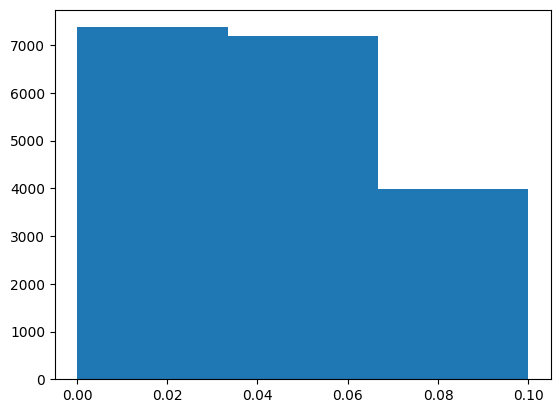

In [73]:
plt.hist(result, bins=3)

In [74]:
values_risk = df_final[RISK].values

values_risk.sort()

third_one = round(values_risk.size/3)

# 0 a lower_limit
lower_limit_risk = values_risk[third_one]

# lower_limit a medium_limit
medium_limit_risk =  values_risk[third_one * 2]

print(lower_limit_risk, medium_limit_risk)

0.0027 0.0089


#### Clean dataset

##### Clean big values

In [75]:
df_final_process = pd.read_csv(FINAL_PATH.format(N_PERIODS))
count = 0

for index, row in df_final_process.iterrows():
  if row[REAL_RETURN] > 1:
    count += 1
    df_final_process = df_final_process.drop(index)

count

57

#### Process final dataset

In [76]:
# def realReturnClass(value):
#   if value > medium_limit_return:
#     return 'high'
#   elif value <= medium_limit_return and value > lower_limit_return:
#     return 'medium'
#   elif value <= lower_limit_return:
#     return 'low'

In [77]:
def realReturnClass(value):
  if value > 0.1:
    return 'high'
  elif value <= 0.1 and value > 0.06:
    return 'medium'
  elif value <= 0.06:
    return 'low'

In [78]:
def riskClass(value):
  if value > medium_limit_risk:
    return 'high'
  elif value <= medium_limit_risk and value > lower_limit_risk:
    return 'medium'
  elif value <= lower_limit_risk:
    return 'low'

In [79]:
#df_final_process = pd.read_csv(FINAL_PATH.format(N_PERIODS))

for index, row in df_final_process.iterrows():
  df_final_process[REAL_RETURN_CLASS][index] = realReturnClass(df_final_process[REAL_RETURN][index])
  df_final_process[RISK_CLASS][index] = riskClass(df_final_process[RISK][index])

df_final_process.to_csv(FINAL_PROCESS_PATH.format(N_PERIODS), index=False)